In [1]:
#importing necessary liabraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv('titanic_dataset.csv')

In [3]:
#for showing first 5 columns of data under heading
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.shape

(891, 12)

In [5]:
#for summary of dataframes such as size and structure
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
#descriptive statistics of a dataframeobject
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
#to count the number of occurance in the classification ccolumn
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [8]:
#identifying null values
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
#to show the column labels
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [10]:
#columns with null values
no_columns =df[['Age', 'Cabin', 'Embarked']]

In [11]:
no_columns.isna().sum()

Age         177
Cabin       687
Embarked      2
dtype: int64

In [12]:
# Drop irrelevant columns
df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

In [13]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


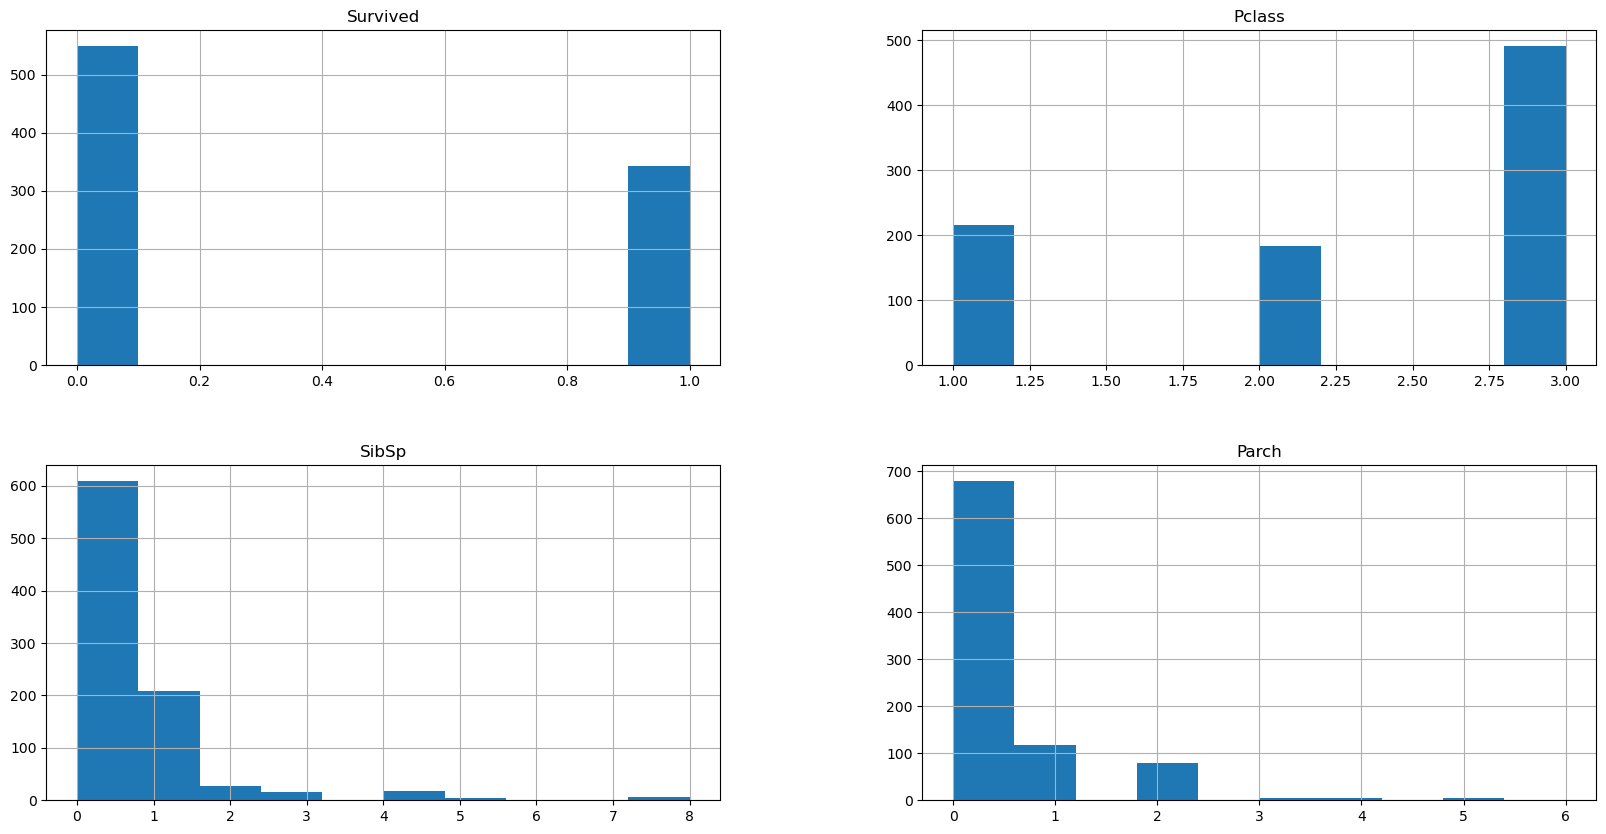

In [14]:
#to find the date is skewed or not
freqgraph= df.select_dtypes(include ='int')
freqgraph.hist(figsize=(20,10))
plt.show()

In [15]:
#removing null values
df['Age']=df['Age'].fillna(df['Age'].median())



In [16]:
df['Embarked'].fillna('not available', inplace=True)

In [17]:
df.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

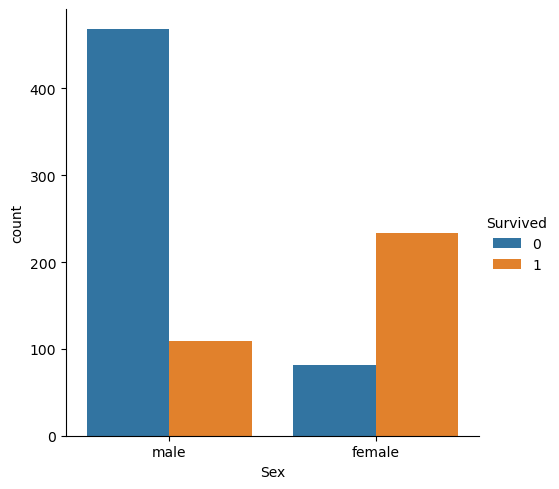

In [18]:
sns.catplot(x ="Sex", hue ="Survived",
kind ="count", data = df)

In [19]:
df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

In [20]:
#importing label encoder to convert categorical column to numerical column
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder() 

In [21]:
df['Sex']= le.fit_transform(df['Sex'])

In [22]:
df['Embarked']= le.fit_transform(df['Embarked'])

In [23]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


In [24]:
#split it into feature and target
y = df['Survived']
X=df.drop(['Survived'],axis=1)

In [25]:
#split the data into testing and training
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.25,random_state=42)

# model training

# 1.KNN

In [26]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
model = clf.fit(X_train,y_train)


In [27]:
y_pred = model.predict(X_test)

In [28]:
#importing knn algorithms
from sklearn.neighbors import KNeighborsClassifier
metric_k=[]
neighbors=np.arange(3,15)

for k in neighbors:
    classifier = KNeighborsClassifier(n_neighbors=k,metric='minkowski',p=2)
    model = classifier.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    acc=accuracy_score(y_test,y_pred)
    metric_k.append(acc)

NameError: name 'accuracy_score' is not defined

In [ ]:
metric_k

In [ ]:
plt.plot(neighbors,metric_k,'o-')
plt.xlabel('k value')
plt.ylabel('accuracy')
plt.grid()
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score
print('Accuracy = ',accuracy_score(y_test,y_pred))
print('Precision = ',precision_score(y_test,y_pred,average='macro'))
print('Recall = ',recall_score(y_test,y_pred,average='macro'))
print('f1 score = ',f1_score(y_test,y_pred,average='macro'))

# 3.SVM

In [ ]:
#svm
from sklearn.svm import SVC
svmclf =SVC(kernel='linear')
            
            
svmclf.fit(X_train,y_train)

In [ ]:
y_pred_svm=svmclf.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [ ]:
print('Accuracy= ',accuracy_score(y_test,y_pred_svm))
print('f1 score = ',f1_score(y_test,y_pred_svm,average='macro'))

In [ ]:
print(confusion_matrix(y_test,y_pred_svm))

In [ ]:
from sklearn.svm import SVC
svmclf =SVC(kernel='rbf')
            
svmclf.fit(X_train,y_train)       

In [ ]:
y_pred_svm=svmclf.predict(X_test)

In [ ]:
print('Accuracy= ',accuracy_score(y_test,y_pred_svm))
print('f1 score = ',f1_score(y_test,y_pred_svm,average='macro'))

In [ ]:
from sklearn.svm import SVC
svmclf =SVC(kernel='poly')
            
svmclf.fit(X_train,y_train)  

In [ ]:
y_pred_svm=svmclf.predict(X_test)

In [ ]:
print('Accuracy= ',accuracy_score(y_test,y_pred_svm))
print('f1 score = ',f1_score(y_test,y_pred_svm,average='macro'))

In [ ]:
import pandas as pd
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [ ]:
# Assume 'X' is your feature matrix and 'y' is your target variable
# Split 'X' and 'y' into training and testing sets as needed


In [ ]:
# Create k-fold and stratified k-fold cross-validation objects
kf = KFold(n_splits=5, shuffle=True, random_state=42)
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [ ]:
# Create a kNN model
knn = KNeighborsClassifier(n_neighbors=5)

# Create an SVM model
svm = SVC(kernel='rbf')

In [ ]:
# Use cross_val_score() function to calculate accuracy scores
# For k-fold cross-validation
kfold_scores_knn = cross_val_score(knn, X, y, cv=kf)
kfold_scores_svm = cross_val_score(svm, X, y, cv=kf)

In [ ]:
# For stratified k-fold cross-validation
skfold_scores_knn = cross_val_score(knn, X, y, cv=skf)
skfold_scores_svm = cross_val_score(svm, X, y, cv=skf)

In [ ]:
# Calculate average accuracy scores
avg_kfold_score_knn = kfold_scores_knn.mean()
avg_kfold_score_svm = kfold_scores_svm.mean()
avg_skfold_score_knn = skfold_scores_knn.mean()
avg_skfold_score_svm = skfold_scores_svm.mean()


In [ ]:
# Print the results
print('k-fold Cross-Validation Scores (kNN):', kfold_scores_knn)
print('Average k-fold Cross-Validation Score (kNN):', avg_kfold_score_knn)
print('k-fold Cross-Validation Scores (SVM):', kfold_scores_svm)
print('Average k-fold Cross-Validation Score (SVM):', avg_kfold_score_svm)

print('Stratified k-fold Cross-Validation Scores (kNN):', skfold_scores_knn)
print('Average Stratified k-fold Cross-Validation Score (kNN):', avg_skfold_score_knn)
print('Stratified k-fold Cross-Validation Scores (SVM):', skfold_scores_svm)
print('Average Stratified k-fold Cross-Validation Score (SVM):', avg_skfold_score_svm)